Task-05

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

##### Import Libraries

In [36]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

##### Load Dataset

In [26]:
df = pd.read_csv(r'Road Accident Data.csv')
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [28]:
df.shape

(307973, 21)

##### Preprocessing Data

In [29]:
df.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [30]:
df.fillna({'Weather_Conditions': 'Unknown'}, inplace=True)
df.fillna({'Road_Surface_Conditions': 'Unknown'}, inplace=True)
df.fillna({'Road_Type': 'Unknown'}, inplace=True)

In [31]:
# drop rows with missing values
df.drop(columns=['Carriageway_Hazards'], inplace=True)

In [33]:
df = df.dropna(subset=['Time'])

In [34]:
df['datetime'] = pd.to_datetime(df['Accident Date'] + ' ' + df['Time'], errors='coerce')
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month_name()

In [35]:
df.isnull().sum()

Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
datetime                      0
hour                          0
month                         0
dtype: int64

#### Data Visualization

1. Accidents by Hour of Day

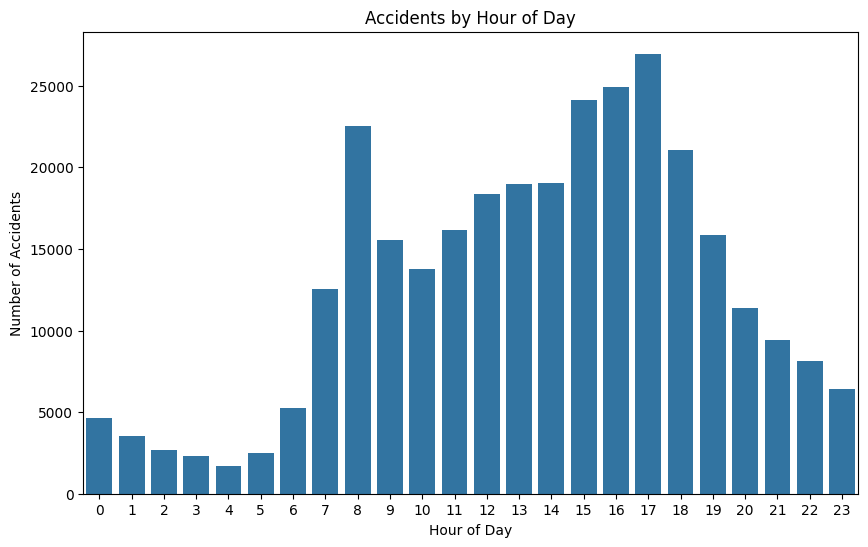

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

Conclusion : 
Most accidents occur during rush hours :   
Morning Peak : around 8 - 9 AM  
Evening Peak : around 4 - 6 PM

2. Accidents by Weather Conditions

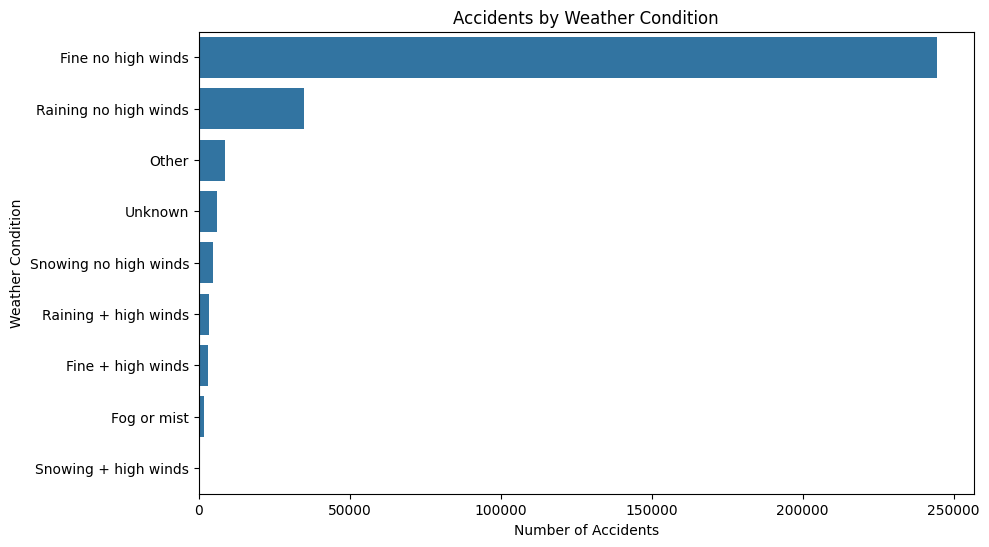

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Weather_Conditions', data=df, order=df['Weather_Conditions'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

Conclusions :   
Poor weather doesn't cause more accidents but worsen accident outcomes when they do occur   

Clear Weather - Most accidents because of exposure  
Rainy, Foggy or Snowy Weather - Higher severity of accidents, even if they are less frequent

3. Accidents by Road Surface Conditions

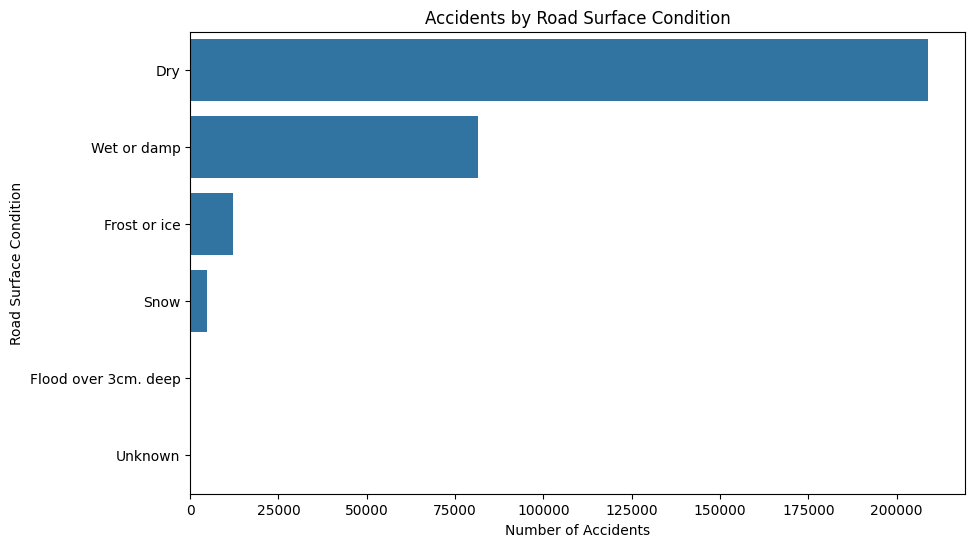

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Road_Surface_Conditions', data=df, order=df['Road_Surface_Conditions'].value_counts().index)
plt.title('Accidents by Road Surface Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Surface Condition')
plt.show()

Conclusions :   
Most accidents occur on dry surfaces due to exposure   
Accidents on wet, icy or snowy roads tends to be more severe

4. Accidents by Day of the Week

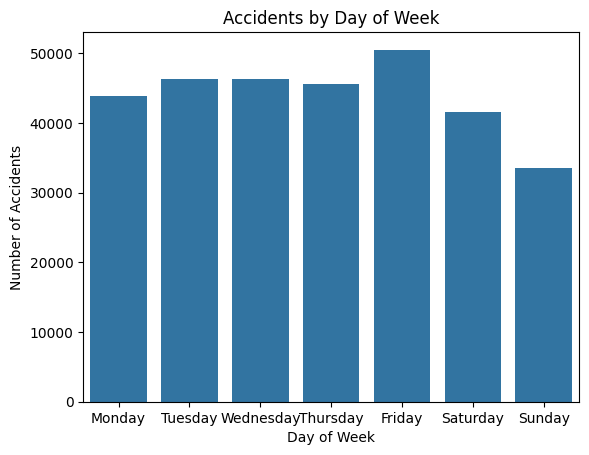

In [42]:
sns.countplot(x='Day_of_Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

Conclusions :  
More accidents occur on Weekdays, especially Friday, than on weekends.

5. Accident severity by Urban vs Rural

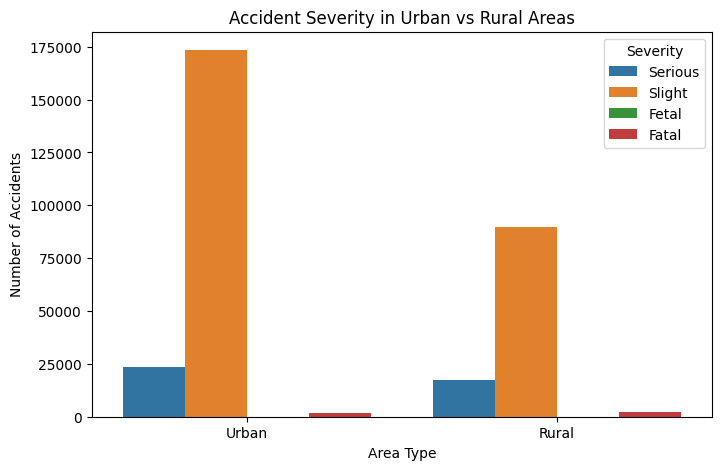

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Urban_or_Rural_Area', hue='Accident_Severity')
plt.title('Accident Severity in Urban vs Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.show()

Conclusions :  
Urban areas have more accidents, but majority are slight in severity.  
Rural areas have fewer accidents

6. Accident Severity by Speed Limit

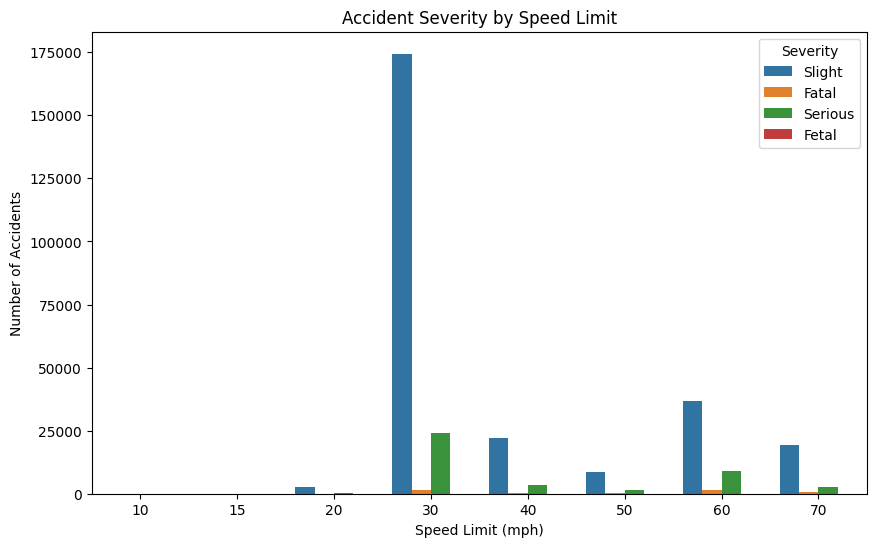

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Speed_limit', hue='Accident_Severity')
plt.title('Accident Severity by Speed Limit')
plt.xlabel('Speed Limit (mph)')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.show()

Conclusions :   
Accidents at lower speed limit ( 20 - 30 mph) are more slight  
Accidents at increase speed limit ( 35 - 70 mph) are serious and fatal